# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [2]:
df= pd.read_csv("MLR.CSV")

# View Dataset

In [3]:
df.head(10)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


Features consist of hourly average ambient variables
- Ambient Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Check if There are any Missing Data

In [6]:
df.isna()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


In [7]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

# Define X and Y 

In [8]:
X=df.drop(["PE"], axis=1)
Y=df["PE"]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

# Split Data into Training Set and Test Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Model the Data on the Training Set

In [30]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [31]:
LR.fit(X_train,Y_train)

LinearRegression()

# Make Predictions from the Model

In [32]:
pred_Y = LR.predict(X_test)

In [33]:
pred_Y

array([459.34807553, 433.90897674, 474.84688676, ..., 477.30216184,
       438.65705683, 444.45543312])

In [36]:
LR.predict([[14.47,41.76,1021.98,78.41]])

array([467.25967458])

In [37]:
#Check the difference between the actual values and the predicted values
diff= Y_test-pred_Y
print(diff)

5014   -0.428076
6947   -3.358977
9230   -0.996887
4290    0.886096
6477    3.907684
          ...   
842    -2.077355
2600    5.951793
7903    1.937838
4280   -3.627057
8663   -0.195433
Name: PE, Length: 2871, dtype: float64


# Metrics

In [38]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_Y)*100

93.14903016612917

# Visualization of Result

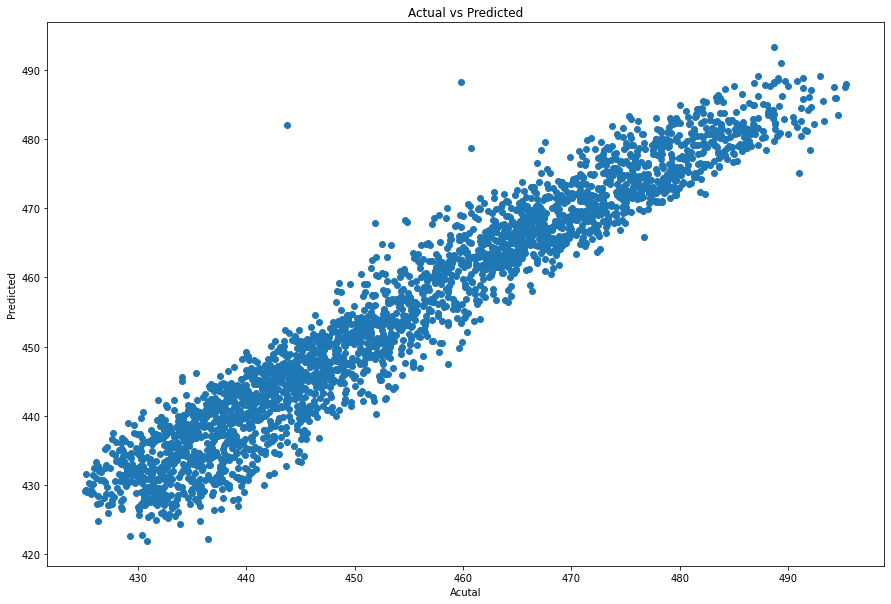

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,pred_Y)
#plt.plot(X_train,LR.predict(X_train),color='purple')
plt.xlabel("Acutal")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()